<a href="https://colab.research.google.com/github/jchoi92k/CS8980/blob/main/Homework_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TEXT: Using Shakespeare’s “The Life and Death of Julius Caesar” found as
hw_1-text.txt under this iCollege assignment. Write the following pieces of code:

1. Write a piece of code using a regular expression in Python to count how many times
the following name appears: CICERO, this regex needs to be case-sensitive. (10 points)

In [ ]:
import re

with open('hw_1-text.txt', 'r', encoding='utf-8') as f:
  ctext = f.read()

ciceros = re.findall(r"\bCICERO\b", ctext)
print(len(ciceros))

7


2. Write a regular expression in Python that finds all 6 character words found in this play.
(10 points)


In [ ]:
#For all tokens (case sensitive)
sixchars = re.findall(r"\b\w{6}\b", ctext)
#For all types (case sensitive)
sixchars_types = set(sixchars)
#For all types (case insensitive)
sixchars_types_ics = set([w.lower() for w in sixchars_types])
print(sixchars_types_ics)

{'brains', 'strike', 'griefs', 'cobble', 'knotty', 'beauty', 'dearer', 'drives', 'bloods', 'should', 'banish', 'vulgar', 'bribes', 'upmost', 'almost', 'ghosts', 'fought', 'utmost', 'arrive', 'hounds', 'stains', 'orator', 'humble', 'pompey', 'bright', 'senses', 'sennet', 'gently', 'window', 'actors', 'fields', 'fellow', 'pocket', 'sweaty', 'darest', 'sparks', 'number', 'brands', 'intend', 'shrewd', 'waving', 'common', 'sleepy', 'memory', 'strain', 'repair', 'subtle', 'plutus', 'coward', 'colour', 'itself', 'render', 'smiles', 'bowels', 'regard', 'slight', 'scarfs', 'living', 'rogues', 'bathed', 'suitor', 'redder', 'tricks', 'damned', 'notest', 'shores', 'corpse', 'afraid', 'greets', 'strato', 'headed', 'denied', 'kingly', 'visage', 'nature', 'aweary', 'sounds', 'ruffle', 'matter', 'hidden', 'faults', 'cursed', 'wreath', 'lovest', 'higher', 'divers', 'chance', 'mouths', 'merely', 'breast', 'betray', 'foamed', 'myself', 'season', 'wander', 'losing', 'bosoms', 'ground', 'comest', 'parley',

3. Write a piece of code that uses a regular expression in Python to count how many
words are capitalized in the first letter only. (20 points)

In [ ]:
# Including 1-letter-words
fcapt = re.findall(r"\b[A-Z][a-z]*\b", ctext)
# Excluding 1-letter-words
fcapt_m = [w for w in fcapt if len(w) > 1]
print(len(fcapt))

4376


4. Write a regular expression using groups in Python that extracts all phrases that have
“son of ” and extract/output the answer in a case-insensitive way. For example, for the
following “I am the son of earth”, should find “son of earth” and extract/output “earth”.
(20 points)

In [ ]:
#Find all phrases and create a list
sonof = re.findall(r"(?i)\b(son) (of) ([a-z]+)", ctext)
#All words (tokens) that fill the slot in the phrase "son of X"
sonofn = [w[-1] for w in sonof]
#For types
sonofn_types = set(sonofn)

print(sonofn)

['Rome', 'Caesar', 'Marcus', 'Marcus']


6. Write a Python function that takes the file as an input and outputs how many lines end
with: ? , that is a question mark at the end of the line. This function needs to use a
regular expression. (20 points)

In [ ]:
def findq(textpath):
  with open(textpath, 'r', encoding='utf-8') as f:
    return len([w for w in f if re.search(r'\?$', w) != None])

print(findq('hw_1-text.txt'))

215


7. Using the code from Class 04, train a Random Forest classification model for the same
two newsgroups, generate the confusion matrix, and all the same performance metrics.
(50 points)


Accuracy: 0.9121019108280255
Precision: 0.9291338582677166
Recall: 0.8939393939393939
F1 Score: 0.91209278094524
Mean Absolute Error: 0.08789808917197452
Mean Squared Error: 0.08789808917197452
Root Mean Squared Error: 0.2964761190584741


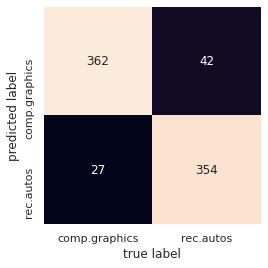

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import sklearn.metrics
from sklearn.datasets import fetch_20newsgroups
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline


#Codes from Class 04: For Bag of Words
data = fetch_20newsgroups()
categories = ['rec.autos','comp.graphics']

train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

#Use RandomForestClassifier to make pipeline
model = make_pipeline(CountVectorizer(), RandomForestClassifier())

model.fit(train.data, train.target)
labels = model.predict(test.data)

mat = confusion_matrix(test.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=train.target_names, yticklabels=train.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')

print('Accuracy:', sklearn.metrics.accuracy_score(test.target,labels))
print('Precision:', sklearn.metrics.precision_score(test.target,labels))
print('Recall:', sklearn.metrics.recall_score(test.target,labels))
print('F1 Score:', sklearn.metrics.f1_score(labels, test.target, average='macro'))
print('Mean Absolute Error:', sklearn.metrics.mean_absolute_error(test.target,labels))
print('Mean Squared Error:', sklearn.metrics.mean_squared_error(test.target, labels))  
print('Root Mean Squared Error:', np.sqrt(sklearn.metrics.mean_squared_error(test.target, labels)))

Accuracy: 0.9210191082802548
Precision: 0.9348958333333334
Recall: 0.9065656565656566
F1 Score: 0.9210159039272963
Mean Absolute Error: 0.07898089171974522
Mean Squared Error: 0.07898089171974522
Root Mean Squared Error: 0.2810353922902687


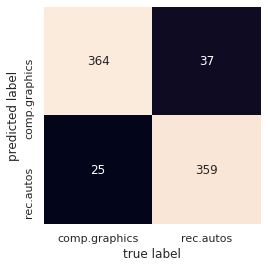

In [ ]:
#Codes from Class 04: For TF-IDF
model = make_pipeline(TfidfVectorizer(), RandomForestClassifier())

model.fit(train.data, train.target)
labels = model.predict(test.data)

mat = confusion_matrix(test.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=train.target_names, yticklabels=train.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')

print('Accuracy:', sklearn.metrics.accuracy_score(test.target,labels))
print('Precision:', sklearn.metrics.precision_score(test.target,labels))
print('Recall:', sklearn.metrics.recall_score(test.target,labels))
print('F1 Score:', sklearn.metrics.f1_score(labels, test.target, average='macro'))
print('Mean Absolute Error:', sklearn.metrics.mean_absolute_error(test.target,labels))
print('Mean Squared Error:', sklearn.metrics.mean_squared_error(test.target, labels))  
print('Root Mean Squared Error:', np.sqrt(sklearn.metrics.mean_squared_error(test.target, labels)))

Bonus (15 points): Using the code from Class 04. Write a function to find the best
performing model for the TF-IDF vectorization. The requirements for this are: 1) Pass all
metrics for each model in a single dataframe (each row has a metric value, each column
is a model type). 2) Make the decision of the best model by counting which column has
the highest F1-score and accuracy.

In [ ]:
import pandas as pd
from sklearn.linear_model import Perceptron, LogisticRegression

# Function takes input as list of tuples: [(classifier function, name) ...]
def bmodel_finder(clsfr_list):
    # Fetch data
    data = fetch_20newsgroups()
    categories = ['rec.autos','comp.graphics']

    # Create train/test sets
    train = fetch_20newsgroups(subset='train', categories=categories)
    test = fetch_20newsgroups(subset='test', categories=categories)

    # List to be turned into dataframe
    dfl = []

    for clsfr in clsfr_list:
      model_mn = make_pipeline(TfidfVectorizer(), clsfr[0]())
      model_mn.fit(train.data, train.target)
      labels_mn = model_mn.predict(test.data)

      # Create variables and append to dfl
      accuracy = sklearn.metrics.accuracy_score(test.target,labels_mn)
      precision = sklearn.metrics.precision_score(test.target,labels_mn)
      recall = sklearn.metrics.recall_score(test.target,labels_mn)
      f_one = sklearn.metrics.f1_score(labels_mn, test.target, average='macro')
      mae = sklearn.metrics.mean_absolute_error(test.target,labels_mn)
      mse = sklearn.metrics.mean_squared_error(test.target, labels_mn)
      rmse = np.sqrt(sklearn.metrics.mean_squared_error(test.target, labels_mn))
      dfl.append([clsfr[1], accuracy, precision, recall, f_one, mae, mse, rmse])
    
    # Create data frame
    fdf = pd.DataFrame(dfl, columns=['Name', 'Accuracy', 'Precision', "Recall", "F1 Score", "Mean Absolute Error", "Mean Squared Error", "Root Mean Squared Error"])
    fdf = fdf.set_index('Name')

    # Final Dataframe to work with (rows: metric value, columns: model type)
    fdf = fdf.T

    # Compare F1 Scores and Accuracy of different models
    high = 0
    res = ''
    for col in fdf.columns:
      foneacc = fdf[col]['F1 Score'] + fdf[col]['Accuracy']
      if foneacc > high:
        high = foneacc
        res = col
      else:
        pass
    
    return res

# sample code comparing three different models: Naive Bayes, Perceptron, and Logistic Regression
best_model = bmodel_finder([(MultinomialNB, 'Multinomial Naive Bayes'), (Perceptron, 'Perceptron'), (LogisticRegression, 'Logistic Regression')])

In [ ]:
best_model

'Logistic Regression'